## Shapiro Wiki Test
This function returns a test statistic and a corresponding p-value. If the p-value is below a certain significance level, then we have sufficient evidence to say that the sample data does not come from a normal distribution.


In [54]:
import scipy as si
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [55]:
# Example the Shapiro-Wilk Normality Test
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.970, p=0.892
Probably Gaussian


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

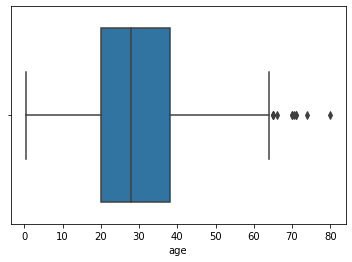

In [56]:
ks = sns.load_dataset('titanic')
# histrogram
#ks['age'].hist()
# Boxplot
sns.boxplot(ks['age'])

<AxesSubplot:>

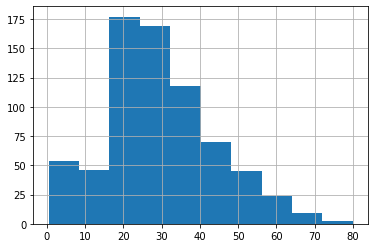

In [57]:
ks['age'].hist()

In [58]:
# Normailty test of age
stat, p = shapiro(ks['age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The Data is Normal')
else:
    print('The Data is Not Normal')


stat=nan, p=1.000
The Data is Normal


In [59]:
# Normailty test of age
stat, p = shapiro(ks['age'])
# Drop NaN
ks = ks.dropna()
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Normal Distribution')
else:
    print('Probably Not Normal Distribution')


stat=nan, p=1.000
Probably Normal Distribution


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

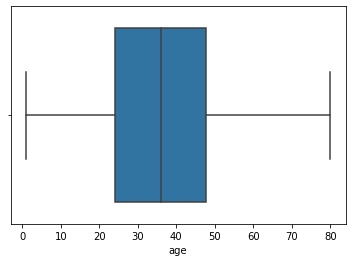

In [60]:
# Create box plot of age
sns.boxplot(ks['age'])

<AxesSubplot:>

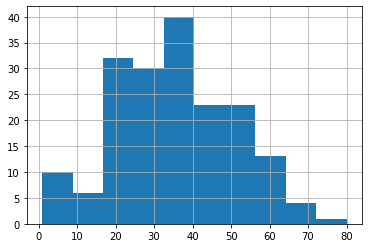

In [61]:
# histogram of age
ks['age'].hist()

## Normailty test of Fare 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

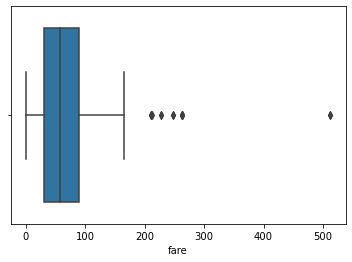

In [62]:
# Create box plot of fare
sns.boxplot(ks['fare'])

<AxesSubplot:>

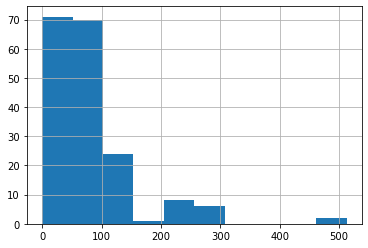

In [63]:
# create histogram of fare
ks['fare'].hist()

In [64]:
# Normailty test of Fare
stat, p = shapiro(ks['fare'])
# Drop NaN
ks = ks.dropna()
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The Data is Normal')
else:
    print('The Data is Not Normal')
    

stat=0.743, p=0.000
The Data is Not Normal


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

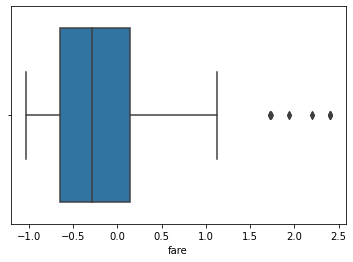

In [65]:
# Data Normalization of Fare
ks['fare'] = (ks['fare'] - ks['fare'].mean()) / ks['fare'].std()
# Drop the outliers of Fare
ks = ks.drop(ks[ks['fare'] > 3].index)
# Balance the data of Fare
ks = ks.drop(ks[ks['fare'] < -3].index)
# Create box plot of fare
sns.boxplot(ks['fare'])

<AxesSubplot:>

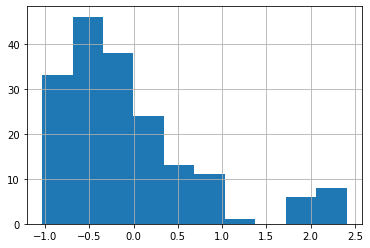

In [66]:
# Create histogram of fare
ks['fare'].hist()

### Correlation
Statistics and data science are often concerned about the relationships between two or more variables (or features) of a dataset. Each data point in the dataset is an observation, and the features are the properties or attributes of those observations.
> Every dataset you work with uses variables and observations. For example, you might be interested in understanding the following:
<li>How the height of basketball players is correlated to their shooting accuracy </li>
<li> Whether there’s a relationship between employee work experience and salary</li>
<li>What mathematical dependence exists between the population density and the gross domestic product of different countries </li>

In [67]:
# Example of the pearson correlation coefficient
# Create a dataframe
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]}
df = pd.DataFrame(data)
# Calculate the pearson correlation coefficient
print(df.corr(method='pearson'))


     x    y
x  1.0  1.0
y  1.0  1.0


In [68]:
# Example of the spearman correlation coefficient
# Create a dataframe
#data1 = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]}
#data2 = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]}
stat, p = si.stats.spearmanr(ks['age'], ks['fare'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The Data Indepent')
else:
    print('The Data is dependent')


stat=-0.074, p=0.320
The Data Indepent


## 3- Chi Squared Test
The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables. In this article, we will perform the test using a mathematical approach and then using Python’s SciPy module.
First, let us see the mathematical approac

In [69]:
from scipy.stats import chi2_contingency

# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')


p value is 0.1031971404730939
Independent (H0 holds true)


In [70]:
# Chi-square test for independence of two categorical variables
# Create a dataframe
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The Data Indepent')
else:
    print('The Data is dependent')

stat=4.542, p=0.103
The Data Indepent


## 4- ANOVA 

In [71]:
# Anova test for independence of two categorical variables
# Create a dataframe
data = [[207, 282, 241], [234, 242, 232]]
stat, p, = si.stats.f_oneway(data[0], data[1])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The Data Indepent')
else:
    print('The Data is dependent')


stat=0.112, p=0.755
The Data Indepent


In [74]:
# Example of student's t-test
# Create a dataframe
#data = [[207, 282, 241], [234, 242, 232]]
data1 =ks['age'].dropna()
data2 =ks['fare'].dropna()
stat, p = si.stats.ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The Data Indepent')
else:
    print('The Data is dependent')



stat=30.343, p=0.000
The Data is dependent
